## Metric 1: Crime

There needs to be crime to be able to fight crime. For this metric, we used a dataset that records crime by neighborhood. The top neighborhood will be the one with the most amount of crime reported.

In [1]:
import pandas as pd
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

crime = pd.read_csv("incident.csv")
crime.head(5)

PK       CCR  HIERARCHY         INCIDENTTIME  \
0  2802309  16000001         10  2016-01-01T00:00:00   
1  2803174  16004547         11  2016-01-01T00:01:00   
2  2801809  16000367          4  2016-01-01T00:10:00   
3  2802315  16000035         10  2016-01-01T00:15:00   
4  2802312  16000024          4  2016-01-01T00:16:00   

                                INCIDENTLOCATION CLEAREDFLAG  \
0  400 Block North Shore DR Pittsburgh, PA 15212           Y   
1    5400 Block Carnegie ST Pittsburgh, PA 15201           N   
2  500 Block Mt Pleasant RD Pittsburgh, PA 15214           N   
3         300 Block Wood ST Pittsburgh, PA 15222           Y   
4  500 Block Mt Pleasant RD Pittsburgh, PA 15214           N   

          INCIDENTNEIGHBORHOOD INCIDENTZONE  \
0                  North Shore            1   
1          Upper Lawrenceville            2   
2            Northview Heights            1   
3  Golden Triangle/Civic Arena            2   
4            Northview Heights            1   

                      INCIDENTHIERARCHYDESC  \
0            HARRASSMENT/THREAT/ATTEMPT/PHY   
1                        THEFT BY DECEPTION   
2   DISCHARGE OF FIREARM INTO OCC.STRUCTURE   
3            HARRASSMENT/THREAT/ATTEMPT/PHY   
4  PROP MISSILE INTO OCC VEHICLE/OR ROADWAY   

                                            OFFENSES  INCIDENTTRACT  \
0  2702 Aggravated Assault. / 2709(a) Harassment....         2205.0   
1                           3922 Theft by Deception.         1011.0   
2  2707.1 Discharge of a Firearm into Occupied St...         2609.0   
3        2709(a)(3) Harassment No Legitimate Purpose          201.0   
4  2705 Recklessy Endangering Another Person. / 3...         2609.0   

   COUNCIL_DISTRICT  PUBLIC_WORKS_DIVISION          X          Y  
0               1.0                    6.0 -80.012337  40.446263  
1               7.0                    2.0 -79.950295  40.482290  
2               1.0                    1.0 -80.000966  40.478651  
3               6.0                    6.0 -80.001251  40.438918  
4               1.0                    1.0 -80.000966  40.478651

Now that we have seen what the dataset looks like, we need to see which neighborhoods appear the most. To do this, we are going to use count(). We are also storing this information in a dataframe, so we can use it later when creating a map.

In [2]:
numIncidents = crime.groupby("INCIDENTNEIGHBORHOOD").count()["INCIDENTLOCATION"]
numData = pd.DataFrame(numIncidents)
numData.columns = ["COUNT"]
numData.sort_values(by= 'COUNT', ascending=False)

COUNT
INCIDENTNEIGHBORHOOD              
South Side Flats              4419
Golden Triangle/Civic Arena   3637
Carrick                       2435
Bloomfield                    2418
Shadyside                     1803
...                            ...
Outside County                  42
Outside State                   41
Chartiers City                  37
Mount Oliver                    36
Mt. Oliver Boro                 16

[98 rows x 1 columns]

According to the dataframe above, South Side Flats is the neighborhood with the most crime. Let's visualize this data.

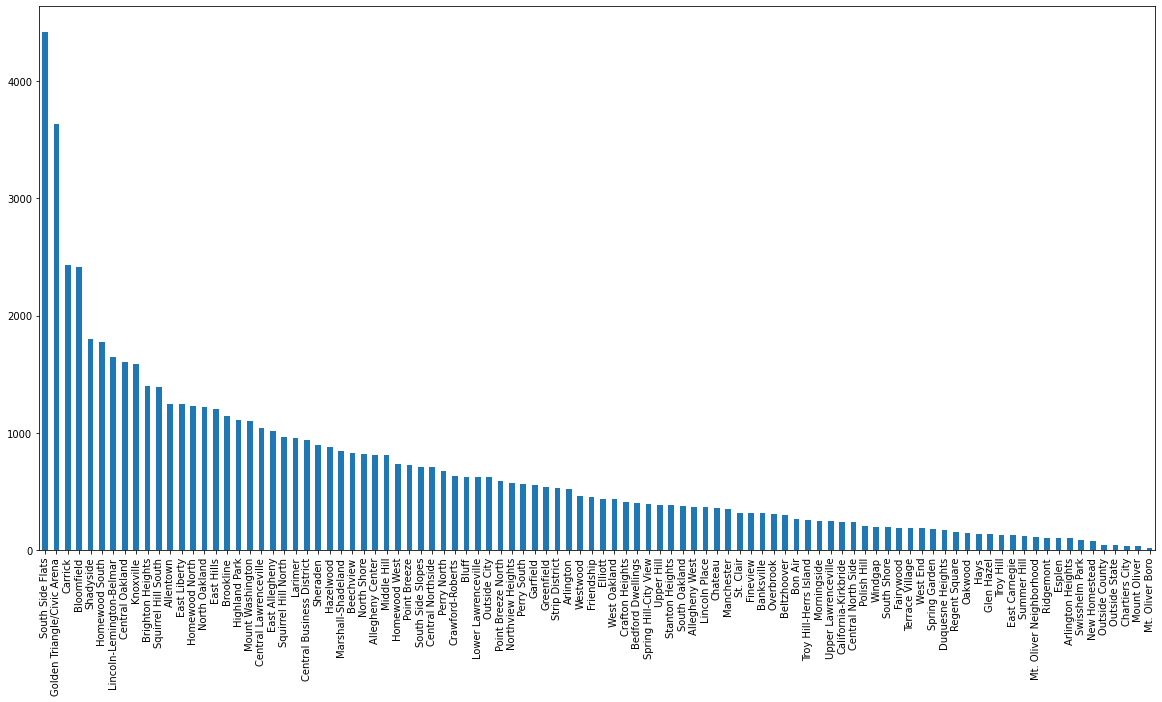

In [3]:
crime["INCIDENTNEIGHBORHOOD"].value_counts().plot(kind='bar', rot=90, figsize=(20, 10))

Although this bar graph lists all of the neighborhoods, it is inefficient because of difference of crime between the first and last neighborhood. To get a better idea of which neighborhoods have the most amount of crime, let's just look at the top twenty.

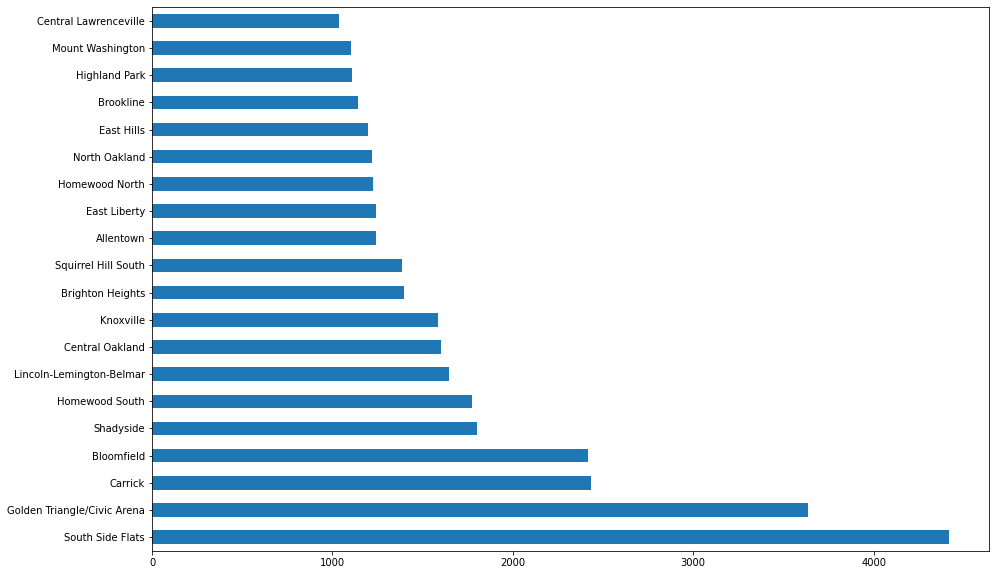

In [4]:
crimesort = crime["INCIDENTNEIGHBORHOOD"].value_counts()
crimesort[:20].plot.barh(x="Neighborhood",y="Incidents",
                                 figsize=(15,10))

Ok, now that we know the top 20 neighborhoods, we decided to create a scatter plot with the location of each neighborhood that has a recorded crime.

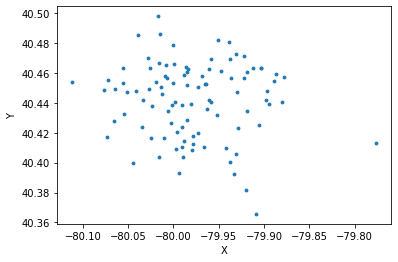

In [5]:
crime_mask = crime["X"]< 0
crime_mask2 = crime["Y"]> 0
crime = crime[crime_mask & crime_mask2]
dropDup = crime.drop_duplicates(subset=['INCIDENTNEIGHBORHOOD'])
dropDup.plot.scatter(x = 'X', y = 'Y', s=8)

However, this doesn't show which area has the most amount of crime. To create a visualization that does this, we used a geopandas map. First, let's import the shape file.

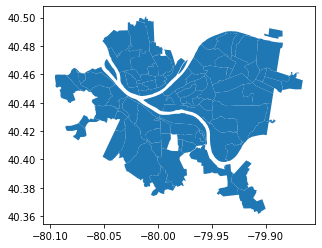

In [6]:
neighborhoods = geopandas.read_file("Neighborhoods_.shp")
neighborhoods.plot()

Next, we merged the dataframe that we created earlier with the shape file dataset. The purpose of doing this was so that we could create our own column called "COUNT", which holds the number of crimes reported per neighborhood. 

In [7]:
crime_map = neighborhoods.merge(numData, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
crime_map.sort_values(by='COUNT', ascending=False)

objectid  fid_blockg statefp10 countyfp10 tractce10 blkgrpce10  \
61      1354          16        42        003    170200          1   
76      1369          74        42        003    290400          3   
24      1317          73        42        003    080200          2   
31      1324         167        42        003    070900          2   
21      1314         286        42        003    130400          3   
..       ...         ...       ...        ...       ...        ...   
71      1364         202        42        003    561600          1   
54      1347          83        42        003    141100          1   
20      1313         326        42        003    310300          1   
86      1379         265        42        003    563000          4   
69      1362         147        42        003    561700          2   

         geoid10     namelsad10 mtfcc10 funcstat10  ...           plannerass  \
61  420031702001  Block Group 1   G5030          S  ...        Anthony Kobak   
76  420032904003  Block Group 3   G5030          S  ...       Sophia Robison   
24  420030802002  Block Group 2   G5030          S  ...  Christopher Corbett   
31  420030709002  Block Group 2   G5030          S  ...  Christopher Corbett   
21  420031304003  Block Group 3   G5030          S  ...  Christopher Corbett   
..           ...            ...     ...        ...  ...                  ...   
71  420035616001  Block Group 1   G5030          S  ...        Anthony Kobak   
54  420031411001  Block Group 1   G5030          S  ...        Ose Akinlotan   
20  420033103001  Block Group 1   G5030          S  ...        Ose Akinlotan   
86  420035630004  Block Group 4   G5030          S  ...       Sophia Robison   
69  420035617002  Block Group 2   G5030          S  ...        Anthony Kobak   

    created_us  created_da last_edite  last_edi_1  temp    Shape__Are  \
61   pgh.admin  2020-08-14  pgh.admin  2020-08-14  None  2.608218e+07   
76   pgh.admin  2020-08-14  pgh.admin  2020-08-14  None  4.664023e+07   
24   pgh.admin  2020-08-14  pgh.admin  2020-08-14  None  1.957410e+07   
31   pgh.admin  2020-08-14  pgh.admin  2020-08-14  None  2.567309e+07   
21   pgh.admin  2020-08-14  pgh.admin  2020-08-14  None  1.091314e+07   
..         ...         ...        ...         ...   ...           ...   
71   pgh.admin  2020-08-14  pgh.admin  2020-08-14  None  3.667473e+06   
54   pgh.admin  2020-08-14  pgh.admin  2020-08-14  None  1.337930e+07   
20   pgh.admin  2020-08-14  pgh.admin  2020-08-14  None  2.215124e+07   
86   pgh.admin  2020-08-14  pgh.admin  2020-08-14  None  3.683820e+06   
69   pgh.admin  2020-08-14  pgh.admin  2020-08-14  None  2.872020e+06   

      Shape__Len                                           geometry   COUNT  
61  34676.151320  POLYGON ((-79.97726 40.43272, -79.97725 40.432...  4419.0  
76  40404.497700  POLYGON ((-79.99194 40.40719, -79.99191 40.407...  2435.0  
24  21204.322895  POLYGON ((-79.94645 40.46547, -79.94621 40.465...  2418.0  
31  25089.464739  POLYGON ((-79.92238 40.46055, -79.92208 40.460...  1803.0  
21  16284.901805  POLYGON ((-79.88666 40.45521, -79.88651 40.455...  1774.0  
..           ...                                                ...     ...  
71  10586.530790  POLYGON ((-79.96568 40.41735, -79.96566 40.417...   103.0  
54  20794.440321  POLYGON ((-79.89143 40.42685, -79.89192 40.426...    83.0  
20  24388.292456  POLYGON ((-79.91621 40.39849, -79.91621 40.398...    78.0  
86   9978.225999  POLYGON ((-80.06919 40.46046, -80.06912 40.460...    37.0  
69   7445.900720  POLYGON ((-79.97842 40.40626, -79.97848 40.406...     NaN  

[90 rows x 40 columns]

Now that the data has been succesfully merged, we then used .plot() to create the map. This map should show an efficient visualization of the neighboorhood with the most crime.

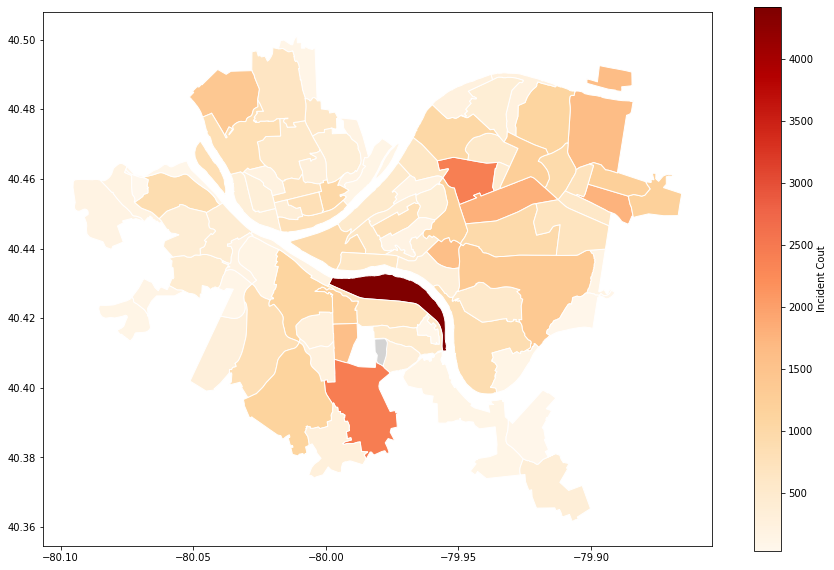

In [8]:
crime_map.plot(column='COUNT',
               cmap='OrRd',              
               edgecolor="white",        
               legend=True,             
               legend_kwds={'label': "Incident Cout"}, 
               figsize=(15, 10),        
               missing_kwds={"color": "lightgrey"} 
               )